# Lab 7 - Nouh's demonstration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
# %matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("../labData/wine.csv") # Classification DF, classify wine quality.
df.head()


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [5]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type', 'quality_ind'],
      dtype='object')

In [7]:
df.drop(columns = ["Unnamed: 0", "type", "quality_ind"], axis = 1, inplace = True)
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

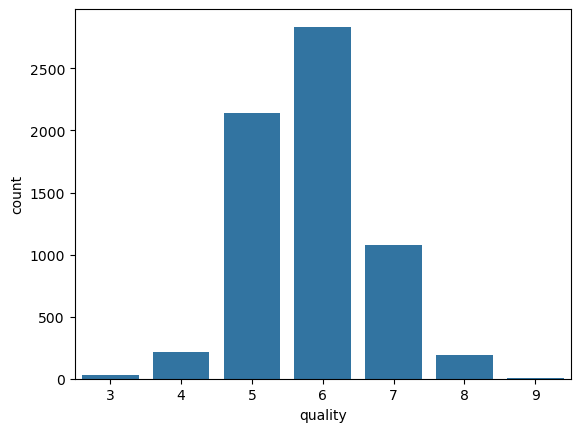

In [ ]:
# Alternatively, use Seaborn to get a plot of the counts. Looks nicer.
sns.countplot(df, x = "quality")

Suggested to convert the 7 values into 2 for **Binary** classification.

In [13]:
df['quality'] = df['quality'].replace([3,4,5,6], 0)
df['quality'] = df['quality'].replace([7,8,9], 1)

In [14]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


<Axes: xlabel='quality', ylabel='count'>

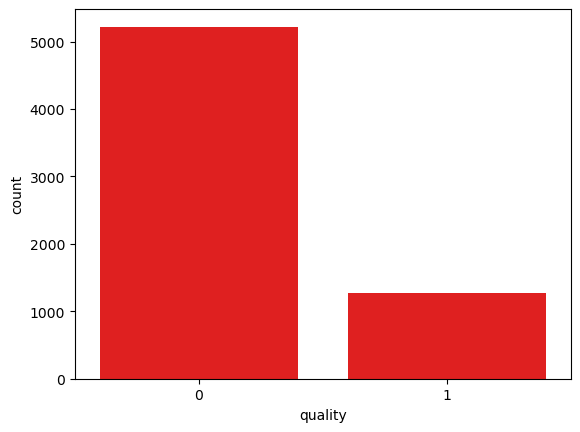

In [ ]:
sns.countplot(df, x = "quality", color = "red") # You can give a color argument if you want, like in R.
# Tackling DF imbalance will be done in Week 8.

In [17]:
X = df.drop(columns = "quality", axis = 1)
y = df['quality']

In [18]:
X

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Random state is the seed for RNG.

In [23]:
X_train.shape

(5197, 11)

In [ ]:
X.shape

(6497, 11)

In [25]:
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-0.47810509, -0.54303355,  0.27985521, ..., -0.86006706,
        -0.75122123, -1.08506915],
       [ 0.97505476, -1.08615999,  0.21093574, ..., -1.60531829,
        -1.14846347, -0.41405807],
       [-0.93699767, -0.3619914 ,  0.14201627, ..., -0.17692009,
        -1.01604939, -0.24630531],
       ...,
       [ 4.72267752, -0.42233878,  2.07176137, ..., -0.3632329 ,
         0.90395477, -0.66568723],
       [ 1.28098315,  0.36217719,  1.31364722, ...,  0.63043542,
         2.4267167 ,  2.43773898],
       [ 0.66912637, -0.42233878,  0.21093574, ...,  0.00939272,
         0.63912661, -0.07855254]])

In [ ]:
X_train.min() # Apparently this is because of the StandardScaler. Normalisation would put them all between 0 and 1.

np.float64(-3.095820768351912)

In [30]:
X_train.max()

np.float64(16.30949210411948)

In [32]:
print(X_test.min())
X_test.max()

-2.9716122288935165


np.float64(16.280109920508423)

# Gaussian Naive Bayes

"Fit" means to train. You can't make predictions until you first fit it with the training set.

In [42]:
gnb = GaussianNB()

In [43]:
gnb.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = gnb.predict(X_test)

In [45]:
gnb_acc = accuracy_score(y_pred, y_test)
gnb_acc
# 77% is "fine", though he didn't seem particularly happy about it.

0.7753846153846153

# KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [47]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_pred, y_test) 
knn_acc
# 84, so KNN has worked better. 
# The dataset is imbalanced though, so perhaps this isn't the best to go by.

0.8438461538461538

# Models DF

It'll be good to use this in the assignment to show a clear comparison between the models.

In [48]:
models = pd.DataFrame({
    "model" : ["GNB", "KNN"],
    "accuracy" : [gnb_acc, knn_acc]
})

In [49]:
models

,model,accuracy
0,GNB,0.775385
1,KNN,0.843846


In [50]:
models.sort_values(by = "accuracy", ascending = False)

,model,accuracy
1,KNN,0.843846
0,GNB,0.775385


**Nouh mentioned you MUST do this in your assignment and the comparison graph.**

<Axes: xlabel='model', ylabel='accuracy'>

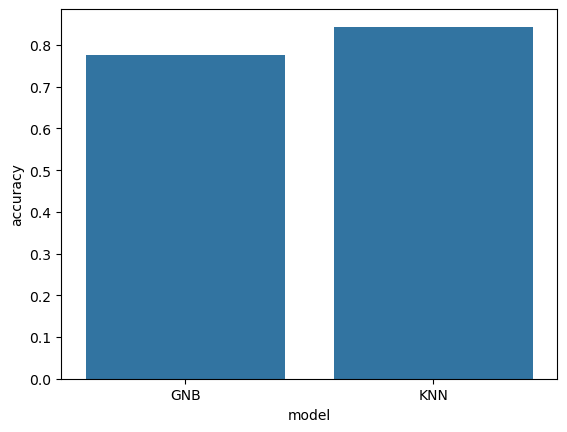

In [ ]:
sns.barplot(models, x = "model", y = "accuracy")

# K-Fold

## Gaussian Naive Bayes (GNB) + KFold

In [58]:
sc = StandardScaler()

In [ ]:
X = sc.fit_transform(X)


In [55]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

In [56]:
gnb = GaussianNB()

In [62]:
# Estimator: The classifier (GNB here)
# X : X, but it needs to be scaled (?)
# Y : Y (target column)
# cv : KFold (?)
gnb_kf = np.mean(cross_val_score(gnb, X, y, cv = kf))
gnb_kf

np.float64(0.7466487830875822)

In [63]:
models = pd.DataFrame({
    "model" : ["GNB", "KNN", "GNB-KF"],
    "accuracy" : [gnb_acc, knn_acc, gnb_kf]
})

<Axes: xlabel='accuracy', ylabel='model'>

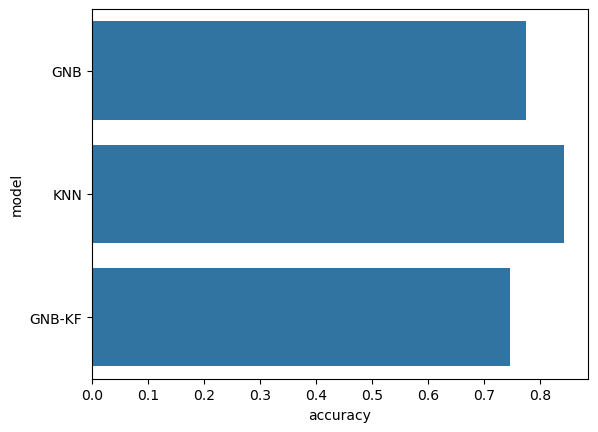

In [65]:
sns.barplot(models, x = "accuracy", y = "model")

That likely isn't what you expected. This is because this dataset is *imbalanced.* In a balanced dataset, KF **should** improve the accuracy rather than reducing it.

In [68]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [ ]:
gnb_skf = np.mean(cross_val_score(gnb, X, y, cv = skf))

In [70]:
models = pd.DataFrame({
    "model" : ["GNB", "KNN", "GNB-KF", "GNB-SKF"],
    "accuracy" : [gnb_acc, knn_acc, gnb_kf, gnb_skf]
})

<Axes: xlabel='accuracy', ylabel='model'>

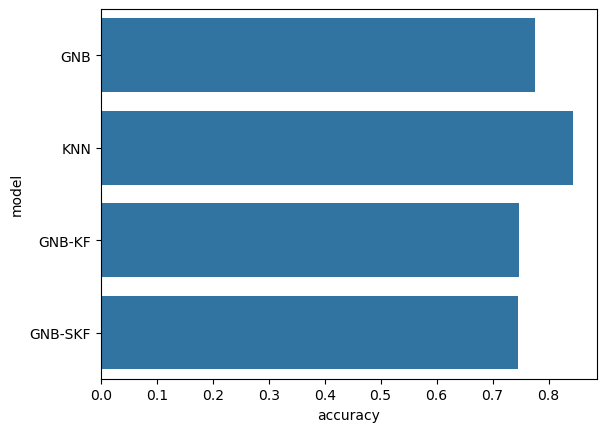

In [71]:
sns.barplot(models, x = "accuracy", y = "model")

In [76]:
a = [1,2,3,4,5,6]
b = [2,4,7]

In [77]:
set(a)

{1, 2, 3, 4, 5, 6}

In [ ]:
# Intersection of sets.
set(a) & set(b)

{2, 4}